## **Section 1_Project**

# 1번

## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename = '/content/drive/MyDrive/data/vgames2.csv'
df = pd.read_csv(filename)

# 상관없는 열 지우기
df=df.drop(['Unnamed: 0'],axis=1)

In [3]:
#결측치 확인 후 제거
df.isna().sum()
df=df.dropna()

In [4]:
# 년도 통일하기
def date(y):
  if y < 21:
    return 2000 + y
  elif 85 < y < 100:
    return 1900 + y
  else:
    return y

df['Year'] = df['Year'].apply(date)

In [5]:
# sales 단위 통일하기
def numer(x):
  if 'K' in x:
    x=x.replace('K','')
    return float(x)*0.001  # 단위 통일
  elif 'M' in x:
    x=x.replace('M','')
    return float(x)
  else:
    return float(x)

sale_columns = df.filter(regex='_Sales').columns  #_Sales 컬럼

for c in sale_columns:
  df[c] = df[c].apply(numer)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df=df.sort_values(by=['Year'], axis=0) # 년도 오름차순 정렬하기

# 장르 확인
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [7]:
# 총 출고량
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] 

In [8]:
# 년도별로 여러 구간을 설정해 df에서 구간별 df를 생성하기- 1980-1989
S_df1=df[(df['Year']>= 1980.0) & (df['Year'] < 1990.0)]
S_df1 = S_df1.rename(columns={'Total_Sales': 'Total_Sales1'})

# 1990-1999
S_df2=df[(df['Year']>= 1990.0) & (df['Year'] < 2000.0)]
S_df2 = S_df2.rename(columns={'Total_Sales': 'Total_Sales2'})

# 2000-2009
S_df3=df[(df['Year']>= 2000.0) & (df['Year'] < 2010.0)]
S_df3 = S_df3.rename(columns={'Total_Sales': 'Total_Sales3'})

# 2010-2020
S_df4=df[(df['Year']>= 2010.0) & (df['Year'] <= 2020.0)]
S_df4 = S_df4.rename(columns={'Total_Sales': 'Total_Sales4'})

##장르&지역별 출고량에 대한 chi square test

In [11]:
# chi square test->H0: all time 장르에 따른 각 지역의 출고량 차이가 없다. (=장르와 출고량에는 연관이 없다.) 
chi_resa1 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['NA_Sales'])) 
# pvalue 0.27642402962771234

#EU chi square test
chi_resa2 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['EU_Sales'])) 
# pvalue 0.16441792001358294
#JP chi square test
chi_resa3 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['JP_Sales'])) 
# pvalue 0.056317610546887886
#EU chi square test
chi_resa4 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['Other_Sales'])) 
# pvalue 0.5533121246950685

print('chi_resa1: ', chi_resa1)
print('chi_resa2: ', chi_resa2)
print('chi_resa3: ', chi_resa3)
print('chi_resa4: ', chi_resa4)
# 검정 결과: 각 지역의 출고량은 장르에 따라 차이 있음

chi_resa1:  (6291.84181788073, 4.767706829042129e-64, 4499, array([[8.81967859e+02, 1.03936950e+02, 1.06929376e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [3.45165199e+02, 4.06765593e+01, 4.18476695e+01, ...,
        7.80740102e-02, 7.80740102e-02, 7.80740102e-02],
       [2.27297272e+02, 2.67862201e+01, 2.75574164e+01, ...,
        5.14130903e-02, 5.14130903e-02, 5.14130903e-02],
       ...,
       [2.30291608e+02, 2.71390924e+01, 2.79204482e+01, ...,
        5.20903885e-02, 5.20903885e-02, 5.20903885e-02],
       [6.25816083e+02, 7.37503233e+01, 7.58736531e+01, ...,
        1.41555323e-01, 1.41555323e-01, 1.41555323e-01],
       [1.82110030e+02, 2.14610554e+01, 2.20789360e+01, ...,
        4.11920448e-02, 4.11920448e-02, 4.11920448e-02]]))
chi_resa2:  (4484.054061491959, 3.0738581086137684e-38, 3322, array([[1.11856905e+03, 2.91063358e+02, 2.47972415e+02, ...,
        1.99495105e-01, 1.99495105e-01, 1.99495105e-01],
       [4.37760975e+02, 1.13909981e+02

##장르별 각 지역의 출고량을 나타낸 bar plot

In [12]:
# alltime: 지역별로 각 장르의 출고량의 합계 구하고 tsum이라는 df에 저장
res1=df.groupby('Genre').NA_Sales.sum()
res2=df.groupby('Genre').EU_Sales.sum()
res3=df.groupby('Genre').JP_Sales.sum()
res4=df.groupby('Genre').Other_Sales.sum()

tsum_df=pd.concat([pd.DataFrame(res1).T, 
                   pd.DataFrame(res2).T, 
                   pd.DataFrame(res3).T, 
                   pd.DataFrame(res4).T], axis=0)

#2010-2020: 지역별로 각 장르의 출고량의 합계 구하고 rtsum이라는 df에 저장
rtsum = pd.concat([pd.DataFrame(S_df4.groupby('Genre').NA_Sales.sum()).T,
                   pd.DataFrame(S_df4.groupby('Genre').EU_Sales.sum()).T,
                   pd.DataFrame(S_df4.groupby('Genre').JP_Sales.sum()).T,
                   pd.DataFrame(S_df4.groupby('Genre').Other_Sales.sum()).T], axis=0)
tsum_df, rtsum

(Genre        Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
 NA_Sales     858.75     101.79    220.35  ...      181.43  667.26     67.83
 EU_Sales     513.64      63.66     99.90  ...      112.99  370.97     44.82
 JP_Sales     156.60      51.87     87.14  ...       63.54  134.76     49.10
 Other_Sales  183.99      16.70     36.15  ...       31.32  132.35     11.23
 
 [4 rows x 12 columns],
 Genre        Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
 NA_Sales     286.40      20.64     38.56  ...       26.69  154.03     13.25
 EU_Sales     234.99      19.07     20.77  ...       25.20  115.63     12.30
 JP_Sales      70.38      15.30     13.75  ...       13.20   15.34      6.60
 Other_Sales   77.83       5.84      8.45  ...        6.00   39.28      3.50
 
 [4 rows x 12 columns])

In [13]:
#지역별로 가장 출고량이 높은 게임의 장르 출력하기
print(tsum_df.max(axis=1))
print(rtsum.max(axis=1))

NA_Sales       858.75
EU_Sales       513.64
JP_Sales       342.93
Other_Sales    183.99
dtype: float64
NA_Sales       286.40
EU_Sales       234.99
JP_Sales        96.10
Other_Sales     77.83
dtype: float64


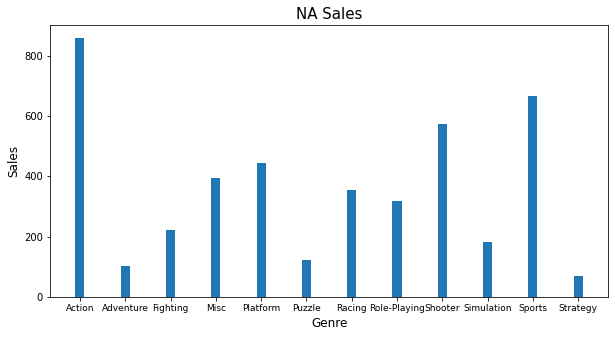

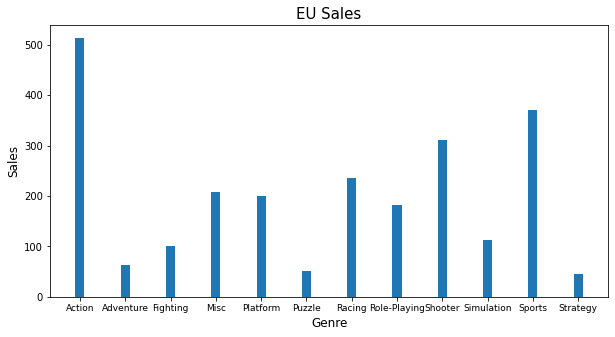

In [14]:
# 각 지역의 출고량 합계 시각화 all time
import matplotlib.pyplot as plt
import numpy as np
label = ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing',
         'Role-Playing','Shooter','Simulation','Sports','Strategy']
index = np.arange(len(label))

#1.NA
plt.figure(figsize=(10,5))
plt.bar(index, res1,width=0.2)
plt.title('NA Sales', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, label, fontsize=9)
plt.show()

#2.EU
plt.figure(figsize=(10,5))
plt.bar(index, res2,width=0.2)
plt.title('EU Sales', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, label, fontsize=9)
plt.show()

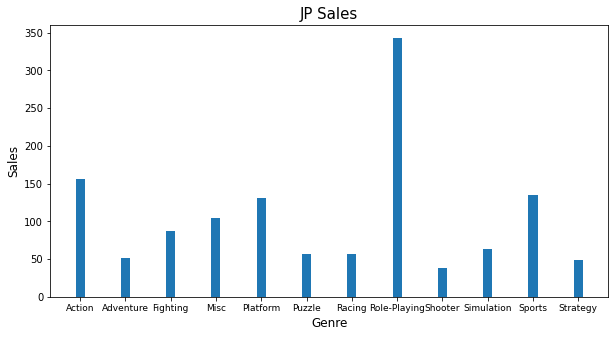

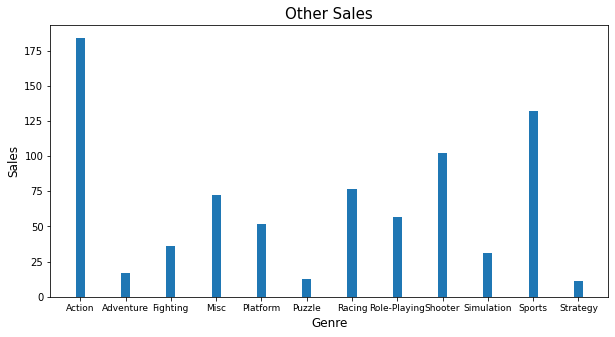

In [15]:
#3.JP
plt.figure(figsize=(10,5))
plt.bar(index, res3,width=0.2)
plt.title('JP Sales', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, label, fontsize=9)
plt.show()

#4.other
plt.figure(figsize=(10,5))
plt.bar(index, res4,width=0.2)
plt.title('Other Sales', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, label, fontsize=9)
plt.show()

<hr/>


# 2번

## 연도와 장르 변수 간의 chi square test

In [16]:
# chi square test-> H0: 연도와 장르 변수가 서로 연관이 없다.
c_t1 = pd.crosstab(index=df['Genre'], columns=df['Year'])
chisq_res1 = stats.chi2_contingency(c_t1)
c_t1, chisq_res1 # pvalue 0.0 -> 귀무가설 기각

(Year          1980.0  1981.0  1982.0  1983.0  ...  2015.0  2016.0  2017.0  2020.0
 Genre                                         ...                                
 Action             1      25      18       7  ...     253     118       1       0
 Adventure          0       0       0       1  ...      53      33       0       0
 Fighting           1       0       0       0  ...      21      14       0       0
 Misc               4       0       1       1  ...      39      18       0       0
 Platform           0       3       5       5  ...      14      10       0       0
 Puzzle             0       2       3       1  ...       6       0       0       0
 Racing             0       1       2       0  ...      19      20       0       0
 Role-Playing       0       0       0       0  ...      78      40       2       0
 Shooter            2      10       5       1  ...      34      32       0       0
 Simulation         0       1       0       0  ...      15       9       0       1
 Spo

## 연도별로 장르마다 총 출고량 bar plot 도출: 1980~2020

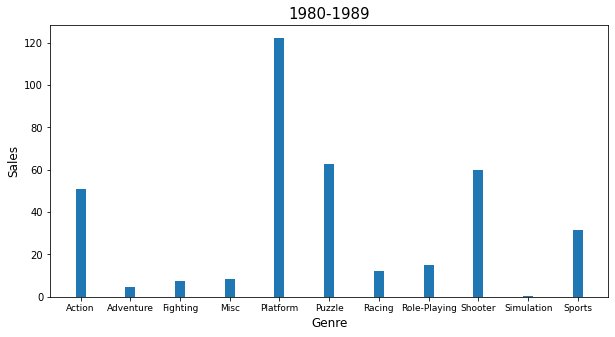

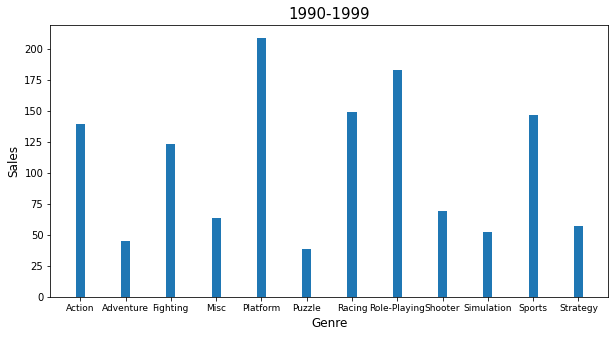

In [18]:
# 1980-1989
lbb= ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing',
         'Role-Playing','Shooter','Simulation','Sports']
indd = np.arange(len(lbb))

plt.figure(figsize=(10,5))
plt.bar(indd, S_df1.groupby('Genre').Total_Sales1.sum(),width=0.2)
plt.title('1980-1989', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(indd, lbb, fontsize=9)
plt.show()

# 1990-1999
lbb2= ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing',
         'Role-Playing','Shooter','Simulation','Sports', 'Strategy']
indd2 = np.arange(len(lbb2))

plt.figure(figsize=(10,5))
plt.bar(indd2, S_df2.groupby('Genre').Total_Sales2.sum(),width=0.2)
plt.title('1990-1999', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(indd2, lbb2, fontsize=9)
plt.show()

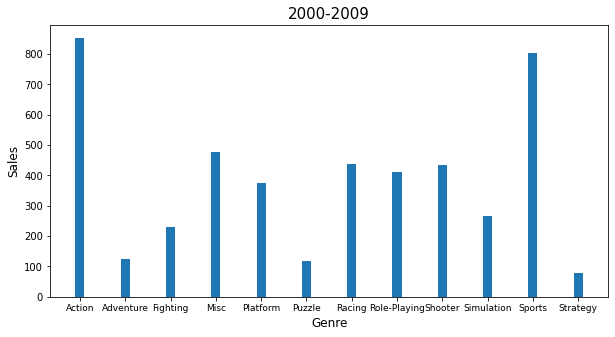

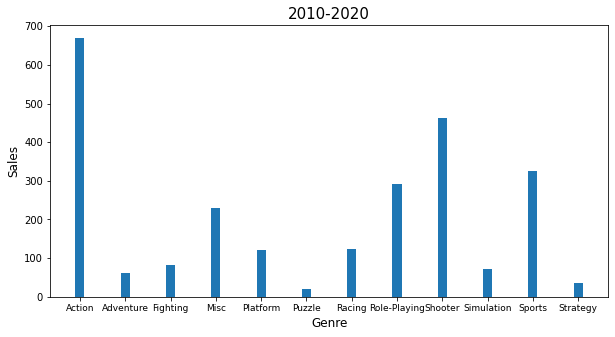

In [19]:
# 2000-2009
plt.figure(figsize=(10,5))
plt.bar(indd2, S_df3.groupby('Genre').Total_Sales3.sum(),width=0.2)
plt.title('2000-2009', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(indd2, lbb2, fontsize=9)
plt.show()

# 2010-2020
plt.figure(figsize=(10,5))
plt.bar(indd2, S_df4.groupby('Genre').Total_Sales4.sum(),width=0.2)
plt.title('2010-2020', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(indd2, lbb2, fontsize=9)
plt.show()

--------------------------------------------------

# 3번

##출고량 높은 게임에 대한 분석 및 시각화

### 1980년부터 2020년까지 총 출고량이 가장 많은 50개 데이터 추출하기

In [20]:
# all time 출고된 게임 df 중 가장 많이 팔린 게임 top 50개 추출하기
max_df1 = df.nlargest(50, 'Total_Sales')
max_df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### 총 출고량 top 50에서 연도, 장르, 플랫폼과 총 출고량의 연관성 확인: chi square test&line plot

In [21]:
# chi square test-> H0: alltime 연도와 출고량이 서로 연관이 없다.(모든 게임)
rc5_resayt = stats.chi2_contingency(pd.crosstab(index=df['Total_Sales'], columns=df['Year']))
rc5_resayt # pvalue 0.0 -> 연도랑 출고량 관련 o

(74243.87970280694,
 0.0,
 38114,
 array([[4.92580506e-04, 2.83233791e-03, 2.21661228e-03, ...,
         2.10578166e-02, 1.84717690e-04, 6.15725633e-05],
        [3.72883443e-01, 2.14407980e+00, 1.67797549e+00, ...,
         1.59407672e+01, 1.39831291e-01, 4.66104304e-02],
        [4.80265993e-01, 2.76152946e+00, 2.16119697e+00, ...,
         2.05313712e+01, 1.80099748e-01, 6.00332492e-02],
        ...,
        [4.92580506e-04, 2.83233791e-03, 2.21661228e-03, ...,
         2.10578166e-02, 1.84717690e-04, 6.15725633e-05],
        [4.92580506e-04, 2.83233791e-03, 2.21661228e-03, ...,
         2.10578166e-02, 1.84717690e-04, 6.15725633e-05],
        [4.92580506e-04, 2.83233791e-03, 2.21661228e-03, ...,
         2.10578166e-02, 1.84717690e-04, 6.15725633e-05]]))

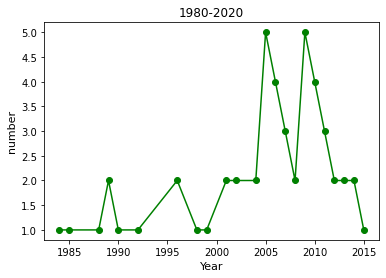

In [22]:
# all time top 50: 언제 출시된 게임이 제일 많은지 확인
plt.plot(max_df1.groupby('Year').Total_Sales.count(), marker='o', color='g')
plt.title('1980-2020', fontsize=12) 
plt.xlabel('Year', fontsize=11)
plt.ylabel('number', fontsize=11)
plt.show()

In [23]:
# chi square test-> H0: alltime 모든 게임 장르와 출고량이 서로 연관이 없다.
rc5_resagt = stats.chi2_contingency(pd.crosstab(index=df['Total_Sales'], columns=df['Genre']))
rc5_resagt # pvalue 5.212202881576482e-06 -> 관련 o

(11700.146876940114,
 5.212202881576482e-06,
 11033,
 array([[1.99495105e-01, 7.80740102e-02, 5.14130903e-02, ...,
         5.20903885e-02, 1.41555323e-01, 4.11920448e-02],
        [1.51017794e+02, 5.91020257e+01, 3.89197094e+01, ...,
         3.94324241e+01, 1.07157379e+02, 3.11823779e+01],
        [1.94507727e+02, 7.61221600e+01, 5.01277631e+01, ...,
         5.07881288e+01, 1.38016440e+02, 4.01622437e+01],
        ...,
        [1.99495105e-01, 7.80740102e-02, 5.14130903e-02, ...,
         5.20903885e-02, 1.41555323e-01, 4.11920448e-02],
        [1.99495105e-01, 7.80740102e-02, 5.14130903e-02, ...,
         5.20903885e-02, 1.41555323e-01, 4.11920448e-02],
        [1.99495105e-01, 7.80740102e-02, 5.14130903e-02, ...,
         5.20903885e-02, 1.41555323e-01, 4.11920448e-02]]))

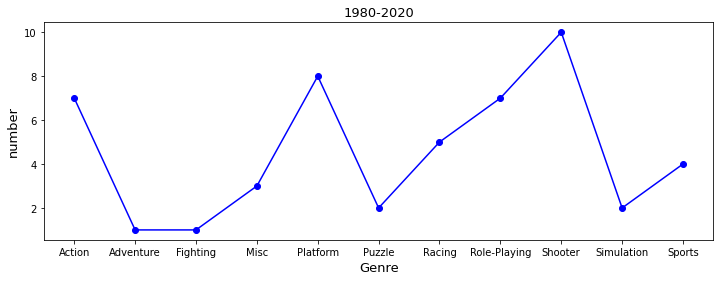

In [24]:
# all time top 50에 어떤 장르가 제일 많은지 확인
plt.figure(figsize=(12,4))
plt.plot(max_df1.groupby('Genre').Total_Sales.count(), marker='o', color='b')
plt.title('1980-2020', fontsize=13) 
plt.xlabel('Genre', fontsize=13)
plt.ylabel('number', fontsize=13)
plt.show()

In [25]:
# chi square test-> H0: alltime 모든 게임 플랫폼과 출고량이 서로 연관이 없다.
rc5_resaplt = stats.chi2_contingency(pd.crosstab(index=df['Total_Sales'], columns=df['Platform']))
rc5_resaplt # pvalue 7.1827567388788175e-236 -> 관련 o

(38860.35382219998,
 7.1827567388788175e-236,
 30090,
 array([[7.08084478e-03, 1.84717690e-04, 3.06631365e-02, ...,
         7.57958254e-02, 4.91964780e-02, 1.30533834e-02],
        [5.36019950e+00, 1.39831291e-01, 2.32119943e+01, ...,
         5.73774398e+01, 3.72417339e+01, 9.88141124e+00],
        [6.90382366e+00, 1.80099748e-01, 2.98965581e+01, ...,
         7.39009297e+01, 4.79665661e+01, 1.27270488e+01],
        ...,
        [7.08084478e-03, 1.84717690e-04, 3.06631365e-02, ...,
         7.57958254e-02, 4.91964780e-02, 1.30533834e-02],
        [7.08084478e-03, 1.84717690e-04, 3.06631365e-02, ...,
         7.57958254e-02, 4.91964780e-02, 1.30533834e-02],
        [7.08084478e-03, 1.84717690e-04, 3.06631365e-02, ...,
         7.57958254e-02, 4.91964780e-02, 1.30533834e-02]]))

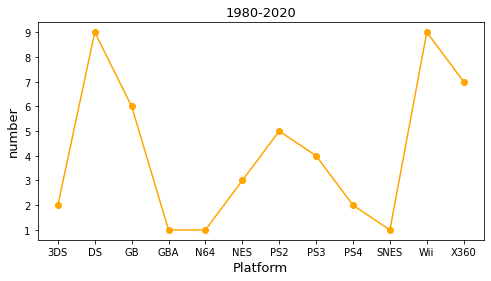

In [26]:
# all time top 50에 어떤 platform 제일 많은지 확인
plt.figure(figsize=(8,4))
plt.plot(max_df1.groupby('Platform').Total_Sales.count(), marker='o', color='orange')
plt.title('1980-2020', fontsize=13) 
plt.xlabel('Platform', fontsize=13)
plt.ylabel('number', fontsize=13)
plt.show()

### top 50에 포함되는 2005~2010년 출시된 게임들의 장르별/플랫폼별 분포도: line plot

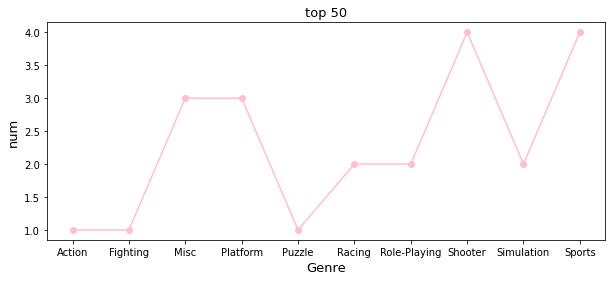

In [28]:
# top 50 중 2005~2010 출시된 게임 장르 및 플랫폼 라인플럿
mmax=max_df1[(max_df1['Year']>= 2005.0) & (max_df1['Year'] < 2011.0)]

plt.figure(figsize=(10,4))
plt.plot(mmax.groupby('Genre').Total_Sales.count(), marker='o', color='pink')
plt.title('top 50', fontsize=13) 
plt.xlabel('Genre', fontsize=13)
plt.ylabel('num', fontsize=13)
plt.show()

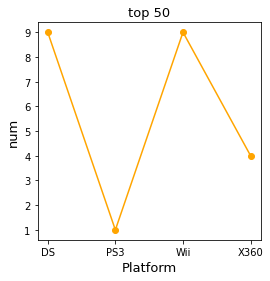

In [47]:
plt.figure(figsize=(4,4))
plt.plot(mmax.groupby('Platform').Total_Sales.count(), marker='o', color='orange')
plt.title('top 50', fontsize=13) 
plt.xlabel('Platform', fontsize=13)
plt.ylabel('num', fontsize=13)
plt.show()

## 다음 출시할 게임에 대한 분석

### 최근 5년간 출시된 게임 중 가장 많이 팔린 top 30 추출

In [30]:
# 최근 5년간 출고된 게임 df 중 가장 많이 팔린 게임 top 30개 추출하기
S_df5=df[(df['Year']>= 2016.0) & (df['Year'] <= 2020.0)]

max_df5 = S_df5.nlargest(30, 'Total_Sales')
max_df5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
15481,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
4010,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
3297,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
16439,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14
11763,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.00
2870,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.72
8557,No Man's Sky,PS4,2016.0,Action,Hello Games,0.58,0.74,0.02,0.26,1.60
13041,Dark Souls III,PS4,2016.0,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
16337,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53
6897,Doom (2016),PS4,2016.0,Shooter,Bethesda Softworks,0.49,0.66,0.02,0.22,1.39


### 최근 5년간 top 30의 장르별/플랫폼별 총 출고량 시각화: line plot

In [31]:
# 최근 5년간 장르별 총 출고량 합계
max_df5.groupby('Genre').Total_Sales.sum()

Genre
Action          10.21
Fighting         2.80
Platform         1.18
Role-Playing     2.19
Shooter         14.45
Sports          11.10
Name: Total_Sales, dtype: float64

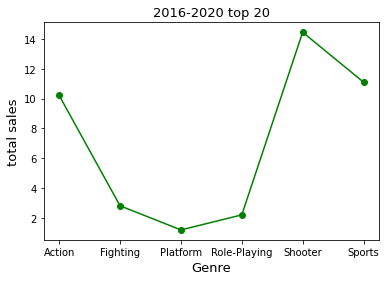

In [32]:
#그래프
plt.figure(figsize=(6,4))
plt.plot(max_df5.groupby('Genre').Total_Sales.sum(), marker='o', color='g')
plt.title('2016-2020 top 20', fontsize=13) 
plt.xlabel('Genre', fontsize=13)
plt.ylabel('total sales', fontsize=13)
plt.show()

In [33]:
# 최근 5년간 플랫폼별 총 출고량 합계
max_df5.groupby('Platform').Total_Sales.sum()

Platform
3DS      3.29
PS4     29.39
WiiU     1.86
XOne     7.39
Name: Total_Sales, dtype: float64

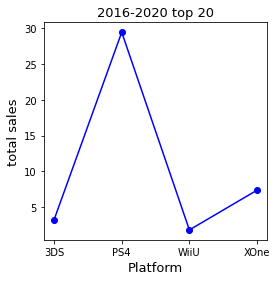

In [48]:
#그래프
plt.figure(figsize=(4,4))
plt.plot(max_df5.groupby('Platform').Total_Sales.sum(), marker='o', color='b')
plt.title('2016-2020 top 20', fontsize=13) 
plt.xlabel('Platform', fontsize=13)
plt.ylabel('total sales', fontsize=13)
plt.show()

### 최근 5년간 top 30의 지역별 출고량의 연관성 확인: chi square test

In [51]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_resne = stats.chi2_contingency(pd.crosstab(index=max_df5['NA_Sales'], columns=max_df5['EU_Sales']))
chisq_resne # pvalue  0.04489022387001295 -> 귀무가설 기각

(660.0,
 0.04489022387001295,
 600,
 array([[0.4       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.2       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       ],
        [0.13333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.06666667, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333],
        [0.13333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.06666667, 0.03333333, 0.03333333,
         0.03333333, 0.

In [52]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_resnj = stats.chi2_contingency(pd.crosstab(index=max_df5['NA_Sales'], columns=max_df5['JP_Sales']))
chisq_resnj # pvalue  0.8145837419568668 -> 귀무가설 채택

(312.69230769230774,
 0.8145837419568668,
 336,
 array([[1.3       , 0.2       , 0.1       , 0.2       , 0.2       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.0333

In [53]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_resej = stats.chi2_contingency(pd.crosstab(index=max_df5['EU_Sales'], columns=max_df5['JP_Sales']))
chisq_resej # pvalue  0.4783682326062064 -> 귀무가설 채택

(350.7692307692308,
 0.4783682326062064,
 350,
 array([[1.73333333, 0.26666667, 0.13333333, 0.26666667, 0.26666667,
         0.13333333, 0.13333333, 0.13333333, 0.13333333, 0.13333333,
         0.13333333, 0.13333333, 0.13333333, 0.13333333, 0.13333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333

In [50]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_resno = stats.chi2_contingency(pd.crosstab(index=max_df5['Other_Sales'], columns=max_df5['NA_Sales']))
chisq_resno # pvalue  0.13181599206896213 -> 귀무가설 채택

(465.0,
 0.13181599206896213,
 432,
 array([[0.3       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.2       , 0.1       , 0.1       , 0.2       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.2       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
        [0.1       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.06666667, 0.03333333, 0.03333333, 0.06666667, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.06666667, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.1       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.06666667, 0.03333333, 0.03333333, 0.06666667, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.06666667, 0.03333333, 0.03333333, 0.03333333, 0.033333

In [38]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_reseo = stats.chi2_contingency(pd.crosstab(index=max_df5['Other_Sales'], columns=max_df5['EU_Sales']))
chisq_reseo # pvalue 0.02397891656533136 -> 연관 o

(511.25,
 0.02397891656533136,
 450,
 array([[0.4       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.2       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       ],
        [0.13333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.06666667, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333],
        [0.13333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.06666667, 0.03333333, 0.03333333,
         0.03333333, 0

In [39]:
# chi square test 2-> H0: 각 지역의 출고량이 서로 연관이 없다 about 최근 5년간 출고량 top 30개 게임
chisq_resjo = stats.chi2_contingency(pd.crosstab(index=max_df5['Other_Sales'], columns=max_df5['JP_Sales']))
chisq_resjo # pvalue  0.05150234265497902 -> 귀무가설 채택

(263.46153846153845,
 0.29715978957779754,
 252,
 array([[1.3       , 0.2       , 0.1       , 0.2       , 0.2       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [0.43333333, 0.06666667, 0.03333333, 0.06666667, 0.06666667,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
         0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333],
        [1.3       , 0.2       , 0.1       , 0.2       , 0.2       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
        [1.3       , 0.2       , 0.1       , 0.2       , 0.2       ,
         0.1       , 0.1       , 0.1       , 0.1  

### 최근 5년간 top 30의 북미/유럽/기타지역 장르별/플랫폼별 총 출고량

In [ ]:
max_df5.groupby('Genre').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,20160.0,3.44,3.23,2.42,1.12,10.21
Fighting,6048.0,1.21,0.89,0.34,0.36,2.80
Platform,2016.0,0.32,0.64,0.04,0.18,1.18
Role-Playing,4032.0,0.58,0.44,0.96,0.21,2.19
Shooter,14112.0,5.82,6.12,0.49,2.02,14.45
Sports,14112.0,3.74,5.76,0.06,1.54,11.10


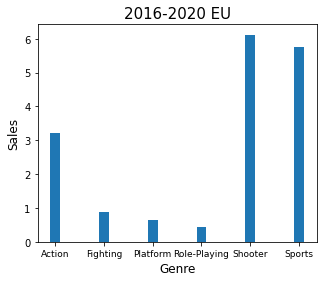

In [40]:
# 최근 5년간 유럽지역 장르별 총 출고량
lb16= ['Action', 'Fighting', 'Platform', 'Role-Playing','Shooter','Sports']
ind16 = np.arange(len(lb16))


plt.figure(figsize=(5,4))
plt.bar(ind16, max_df5.groupby('Genre').EU_Sales.sum(),width=0.2)
plt.title('2016-2020 EU', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(ind16, lb16, fontsize=9)
plt.show()

In [41]:
max_df5.groupby('Genre').NA_Sales.sum()

Genre
Action          3.44
Fighting        1.21
Platform        0.32
Role-Playing    0.58
Shooter         5.82
Sports          3.74
Name: NA_Sales, dtype: float64

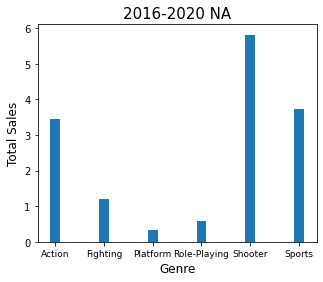

In [42]:
# 최근 5년간 장르별 출고량
plt.figure(figsize=(5,4))
plt.bar(ind16, max_df5.groupby('Genre').NA_Sales.sum(),width=0.2)
plt.title('2016-2020 NA', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ind16, lb16, fontsize=9)
plt.show()

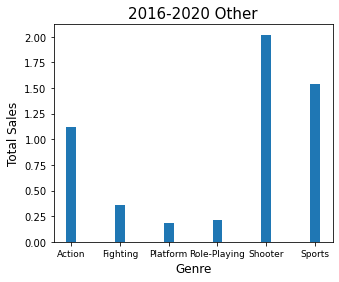

In [43]:
# 최근 5년간 장르별 출고량
plt.figure(figsize=(5,4))
plt.bar(ind16, max_df5.groupby('Genre').Other_Sales.sum(),width=0.2)
plt.title('2016-2020 Other', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ind16, lb16, fontsize=9)
plt.show()

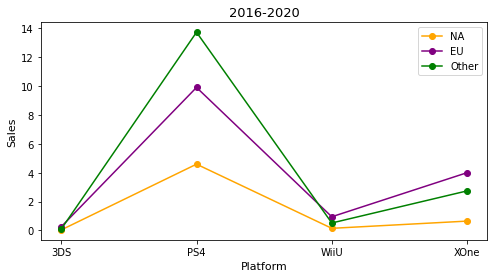

In [45]:
#  최근 5년간 플랫폼별 출고량
plt.figure(figsize=(8,4))
plt.plot(max_df5.groupby('Platform').Other_Sales.sum(), marker='o', color='orange')
plt.plot(max_df5.groupby('Platform').NA_Sales.sum(), marker='o', color='purple')
plt.plot(max_df5.groupby('Platform').EU_Sales.sum(), marker='o', color='green')
plt.title('2016-2020', fontsize=13) 
plt.xlabel('Platform', fontsize=11)
plt.ylabel('Sales', fontsize=11)
plt.legend(['NA', 'EU', 'Other'])
plt.show()